# 1. Introduction

In this project, we will build a deep neural network step by step. In this notebook, we will implement all the functions required to build a neural network from scratch. We will then train the deep neural network, consisting of three steps: forward propagation, backward propagation and parameter update.

# 2. Packages
*   numpy : the fundamental package for scientific computing with Python.
*   matplotlib : a comprehensive library for creating static, animated, and interactive visualizations in Python.
*   math : Python has a built-in module that we can use for mathematical tasks.
*   sklearn.datasets : scikit-learn comes with a few small standard datasets that do not require to download any file from some external website. We will be using the breast cancer wisconsin dataset to build a binary classifier.

⚠️ **NOTICE** ⚠️: 
*   np.random.seed(1) is used to keep all the random function calls consistent.
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets

# 3. Neural network
In this section, we will implement a deep neural network from scratch.

As mentioned before, the process of training a deep neural network is composed of three steps: forward propagation, backward propagation, and parameter update.

In [2]:
class Dense():
    
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_y, n_x)
                           b -- bias vector of shape (n_y, 1)
        """
        np.random.seed(self.seed)

        limit = math.sqrt(6 / (self.n_x + self.n_y))
        W = np.random.uniform(-limit, limit, (self.n_y, self.n_x))
        b = np.zeros((self.n_y, 1))

        assert(W.shape == (self.n_y, self.n_x))
        assert(b.shape == (self.n_y, 1))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data): (size of previous layer, number of examples)
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter 
        """

        Z = np.dot(self.parameters["W"], A) + self.parameters["b"]
        self.cache = (A, self.parameters["W"], self.parameters["b"])
        
        assert(Z.shape == (self.parameters["W"].shape[0], A.shape[1]))
        
        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the cost with respect to the linear output (of current layer l)
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        self.db -- Gradient of the cost with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[1]

        self.dW = 1/m * np.dot(dZ, A_prev.T)
        self.db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T, dZ)
        
        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)
        
        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent
        
        Arguments:
        learning rate -- step size
        """

        self.parameters["W"] = self.parameters["W"] - learning_rate * self.dW
        self.parameters["b"] = self.parameters["b"] - learning_rate * self.db

## 3.1 Implement a linear layer
First, we will start by implementing one of the most commonly used layers in the deep neural network, called the dense layer. The dense layer is a linear layer applying a linear transformation to the incoming data:
$Z = WA + b$, where $W$ and $b$ are the weight and bias.

**Note**: Dense layers, also known as Fully-connected layers, connect every input neuron to every output neuron and are commonly used in neural networks.

### 3.1.1. Initialize parameters
We will create and initialize parameters of a linear layer using Glorot uniform initialization.

**Instructions**:
*   Use random initialization (uniform distribution) for the weight matrices. Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).
*   Use zero initialization for the biases.

### 3.1.2. Linear forward

After initializing parameters, we will need to apply the linear transformation to the incoming data, and this can be simply done by matrix multiplication and addition.

We will implement linear forward by applying the linear transformation.

### 3.1.3. Linear backward
Backpropagation is used to calculate the gradient of the loss function with respect to the parameters.

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose we have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. We want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.Here are the formulas we need:$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)} $$$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

We will use the 3 formulas above to implement `linear_backward()`.

### 3.1.4. Linear update parameters
In this section we will update the parameters of the linear layer, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

We will implement update() to update our parameters using gradient descent.

**Instructions**: 
*   Update parameters using gradient descent on $W^{[l]}$ and $b^{[l]}$.


## 3.2. Activation function layer

In this section, we will need to implement activation function layers. There are many activation functions, such as sigmoid function, softmax function, ReLU function and etc. 



In [7]:
from logging import fatal
class Activation():

    def __init__(self, function):
        self.function = function

    def forward(self, Z):
        if self.function == "sigmoid":
            """
            Implements the sigmoid activation in numpy
            
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            
            Returns:
            A -- output of sigmoid(z), same shape as Z
            
            """

            A = []
            for i in Z:
                l = []
                for n in i:
                    if n >= 0:
                        l.append(1 / (1 + math.exp(-1 * n)))
                    else:
                        l.append(math.exp(n) / (1 + math.exp(n)))
                A.append(l)
            A = np.array(A)
            self.cache = Z
            
            return A

        elif self.function == "softmax":
            """
            Implements the softmax activation in numpy
            
            Arguments:
            Z -- numpy array of any shape (dim 0: number of classes, dim 1: number of samples)
            self.cache -- stores Z as well, useful during backpropagation
            
            Returns:
            A -- output of softmax(z), same shape as Z
            """

            self.cache = Z
            Z = Z.T
            E = math.e
            A = []
            for i in Z:
                b = max(i)
                exp_values = [E**(n-b) for n in i]
                l = exp_values / sum(exp_values)
                A.append(l)
            A = np.array(A)
            A = A.T
            
            return A

        elif self.function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z
            
            """
            A = np.array([[max(n, 0) for n in i] for i in Z])
            self.cache = Z
            
            assert(A.shape == Z.shape)
            
            return A

    def backward(self, dA=None, Y=None):
        if self.function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """
            
            Z = self.cache
            output = self.forward(Z)
            derivative = output * (1-output)
            dZ = dA * derivative
            
            assert (dZ.shape == Z.shape)
            
            return dZ

        elif self.function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """
            
            Z = self.cache
            dZ = np.array(dA, copy = True) # just converting dz to a correct object. 
            dZ[Z <= 0] = 0 # When z <= 0, we should set dz to 0 as well.
            
            assert (dZ.shape == Z.shape)
            
            return dZ

        elif self.function == "softmax":
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [[1], [0], [0]] represents rock, [[0], [1], [0]] represents paper, [[0], [0], [1]] represents scissors 
                                      in a Rock-Paper-Scissors image classification), shape (number of classes, number of examples)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """
            
            Z = self.cache
            s = self.forward(Z)
            dZ = s - Y
            
            assert (dZ.shape == Z.shape)
            
            return dZ

### 3.2.1. Activation forward
#### 3.2.1.1. Sigmoid function
Sigmoid: $\sigma(Z) = \begin{cases}
    \frac{1}{1+e^{-Z}},& \text{if } Z >= 0\\
    \frac{e^{Z}}{1+e^{Z}}, & \text{otherwise}
\end{cases}$. 

❗**Important**❗: As we can see, there is an exponential function inside the sigmoid function, so we might encounter an exponential overflow problem when implementing this function. To solve this problem, we use the numerically stable sigmoid function as shown in the equation above.

#### 3.2.1.2. Softmax function
Softmax: $\sigma(\vec{Z})_i = \frac{e^{Z_i-b}}{\sum_{j=1}^{K} e^{Z_j-b}}$, where $\vec{Z}$ = input vector, $K$ = number of classes in the multi-class classifier, $b$ is $\max_{j=1}^{K} Z_j$

❗**Important**❗: The naive implementation $\sigma(\vec{Z})_i = \frac{e^{Z_i}}{\sum_{j=1}^{K} e^{Z_j}}$ is terrible when there are large numbers! We might encounter the following problems if we use the naive implementation.
*   RuntimeWarning: overflow encountered in exp


#### 3.2.1.3. ReLU (rectified linear unit) function
ReLU: $RELU(Z) = max(Z, 0)$

**Instruction**: 
*   Sigmoid: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).
*   Softmax: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).
*   ReLU: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).

### 3.2.2. Activation backward
Next, we will need to implement the backward functions of `sigmoid()`, `relu()` and `softmax()`+`compute_CCE_cost`.

**Instruction**:
*   sigmoid_backward: Implements the backward propagation for SIGMOID unit.
*   relu_backward: Implements the backward propagation for RELU unit.
*   softmax_CCE_backward: Implements the backward propagation for [SOFTMAX->CCE_LOSS] unit.

If $g(.)$ is the activation function, sigmoid_backward, relu_backward and softmax_backward compute$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

1. The derivative of the sigmoid function is: $$σ^{'}(Z^{[l]}) = σ(Z^{[l]}) (1 - σ(Z^{[l]}))$$. <br>
❗**Important**❗: We should use the numerically stable sigmoid function to prevent the overflow exponential problem. 

2. The derivative of the relu function is: $$g'(Z^{[l]}) = \begin{cases}
    1,& \text{if } Z^{[l]}> 0\\
    0,              & \text{otherwise}
\end{cases}$$

3. TLDR😉: The derivative of the categorical cross-entropy loss with respect to the last hidden layer is: $$\frac{\partial \mathcal{L}}{\partial Z} = s - y $$. <br> The derivative of the softmax function is: $$\frac{\partial S(z_i)}{\partial z_j} = \begin{cases}
    S(z_i) \times (1 - S(z_i)),& \text{if } i = j\\
    -S(z_i) \times S(z_j),              & \text{if } i \neq j
\end{cases}$$, where $z$ is a vector with shape (number of classes K, 1) and $S(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$. Hence, the real derivative of softmax function would be a full Jacobian matrix. For the special case, K = 4, we have <img src="https://miro.medium.com/max/554/1*SWfgFQLDIPXDf1C6CHmr8A.png" height="100"/>. <br> It is quite complicated to calculate the softmax derivative on its own. However, if we use the softmax and the cross entropy loss, that complexity fades away. Since the softmax layer is usually used at the output, we can actually calculate the derivative of the categorical cross-entropy loss with respect to the n-th node in the last hidden layer. Instead of a long clunky formula, we end up with this terse, easy to compute thing: $$\frac{\partial \mathcal{L}}{\partial Z_i} = s_i - y_i $$, where $s$ is the output of the softmax function and the $y$ is the true label vector(one-hot vector). For more information, we can refer to this article [Derivative of the Softmax Function and the Categorical Cross-Entropy Loss](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1). <br> 
❗**Important**❗: The above mathematical derivation is based on naive implementation. In order to deal with the exponential overflow problem, we should use the normalized exponential function when counting $s$. For the sake of simplicity, we just use the same gradient equation as the naive implementation.






## 3.3. Model
Now, we have all the tools that are needed to build a model. Let's get started!

### 3.3.1. Model initialize parameters
First, we will need to initialize our model by creating several linear and activation function layers. 

**Instruction**:
*   Use the functions we have previously written.
*   Store all the linear layers in a list called linear.
*   Store all the activation function layers in a list called activation.

❗**Important**❗: We set the random seed for grading purposes to keep all the random function calls consistent. However, we still want all the linear layers to have different initialized weights, so when implementing this function, please make sure that we pass the number of iterations as the seed number to the Dense layer initialization call.

**Note**: In deep learning, a linear-activation layer is counted as a single layer in the neural network, not two layers since the activation layer does not have any parameter.

In [10]:
class Model():
    
    def __init__(self, units, activation_functions):
        self.units = units
        self.activation_functions = activation_functions
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Arguments:
        self.units -- number of nodes/units for each layer, starting from the input dimension and ending with the output dimension (i.e., [4, 4, 1])
        self.activation_functions -- activation functions used in each layer (i.e, ["relu", "sigmoid"])
        self.linear -- a list to store the dense layers when initializing the model
        self.activation -- a list to store the activation function layers when initializing the model
        """
        self.linear = []
        self.activation = []

        for i in range(len(self.units) - 1):
            self.linear.append(Dense(self.units[i], self.units[i+1], seed = i))
            activation_function = self.activation_functions[i]
            self.activation.append(Activation(activation_function))

    def forward(self, X):
        """
        Arguments:
        X -- input data: (number of features, number of examples)
        
        Returns:
        A -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (number of classes, number of examples)
        """
        A = X

        for i in range(len(self.units) - 1):
            Z = self.linear[i].forward(A)
            A = self.activation[i].forward(Z)

        return A

    def backward(self, AL=None, Y=None):
        """
        Arguments:
        For multi-class classification,
        AL -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (number of classes, number of examples)
        Y -- true "label" vector (one hot vector, for example: [[1], [0], [0]] represents rock, [[0], [1], [0]] represents paper, [[0], [0], [1]] represents scissors 
                              in a Rock-Paper-Scissors image classification), shape (number of classes, number of examples)

        Returns:
        dA_prev -- post-activation gradient
        """

        L = len(self.linear)

        if self.activation_functions[-1] == "sigmoid":
            # Initializing the backpropagation
            E = 1e-5
            dAL = - (np.divide(Y, AL + E) - np.divide(1 - Y, 1 - AL + E)) # derivative of cost with respect to AL, where E = 1e-5 is added to prevent zero division.
            
            # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
            dZ = self.activation[-1].backward(dAL)
            dA_prev = self.linear[-1].backward(dZ)
        else:
            # Initializing the backpropagation
            dZ = self.activation[-1].backward(AL, Y)

            # Lth layer (LINEAR) gradients. Inputs: "dZ". Outputs: "dA_prev"
            dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_prev". Outputs: "dA_prev"
        for i in range(L-2, -1, -1):
            dZ = self.activation[i].backward(dA_prev)
            dA_prev = self.linear[i].backward(dZ)

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        for i in range(L):
            l = self.linear[i]
            l.parameters["W"] = l.parameters["W"] - learning_rate * l.dW
            l.parameters["b"] = l.parameters["b"] - learning_rate * l.db

### 3.3.2. Model forward

After that, we will implement the model forward function by calling the forward function of each layer in the linear and activation function layer we have created in the previous step.

For a $N$-layer neural network, we will call the forward function of the linear layers and then followed by the activation function layers for $N-1$ times. The last activation function layer will be sigmoid for binary classification and softmax for multi-class classification.

**Instruction**:
*   Use the functions we have previously written.
*   Use a for loop to replicate [LINEAR->ACTIVATION] (N-1) times.

**Note**: There are K nodes in the last layer for K-class classification, but only one node for binary classification. Intuitively, this could be pretty confusing sometimes since there should be two nodes in the last layer for binary classification. However, both the one-node(sigmoid, binary cross-entropy) and two-node(softmax, categorical cross-entropy) techniques for binary classification work fine, and picking one technique over the other is a matter of subjective preference. We will implement the former one, which is what we usually do for binary classification.



### 3.3.3. Model backward
Now we will implement the backward function for the whole network. Recall that we have implemented the backward function for the dense and activation function layer. In this section, we will call these functions to help us implement the model backward function. We will iterate through all the hidden layers backward, starting from layer $L$. On each step, we will call the backward function of layer $l$ to backpropagate through layer $l$.

**Instruction**:
*   Use the functions we have previously written.
*   Initialize backpropagation.
*   Use a for loop to backprop from layer $L-1$ to layer $1$.

Initializing backpropagation:

(1) Binary classification: To backpropagate through this network, we know that the output is, $A^{[L]} = \sigma(Z^{[L]})$. Our code thus needs to compute dAL $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$. To do so, use this formula (derived using calculus which we don't need in-depth knowledge of):
```
dAL = - (np.divide(Y, AL + ϵ) - np.divide(1 - Y, 1 - AL + ϵ)) # derivative of cost with respect to AL, where ϵ = 1e-5 is added to prevent zero division.
```

We can then use this post-activation gradient dAL to keep going backward. We can now feed in dAL into the LINEAR->SIGMOID backward function we implemented (which will use the cached values stored inside each layer in the forward pass). After that, we will have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function. 

(2) Multi-class classification: Since we have implemented the backward function of the softmax activation function layer along with the categorical cross-entropy loss, we can directly call the softmax_CCE_backward function implemented inside the activation function layer and followed by the linear backward function to obtain the post-activation gradient to keep going backward. After that, we will have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function.


### 3.3.4. Model update parameters
In this section we will update the parameters of the model, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$
where $\alpha$ is the learning rate.

**Instructions**: 
*   Use the functions we have previously written.
*   Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$.


# 4. Cost function
In this section, we will implement the cost function. We use binary cross-entropy loss for binary classification and categorical cross-entropy loss for multi-class classification. We need to compute the cost, because we want to check if our model is actually learning. Cross-entropy loss is minimized, where smaller values represent a better model than larger values. A model that predicts perfect probabilities has a cross entropy or log loss of 0.0.

## 4.1. Binary cross-entropy loss
Compute the binary cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}+ϵ\right)), where\ ϵ=1e-5$$

In [17]:
def compute_BCE_cost(AL, Y):
    """
    Implement the binary cross-entropy cost function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- binary cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    E = 1e-5
    cost = -1/m * np.sum(np.multiply(np.log(AL+E), Y) + np.multiply((1-Y), np.log(1-AL+E)))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

## 4.2. Categorical cross-entropy loss
Compute the categorical cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right)), where\ ϵ = 1e-5$$

In [19]:
def compute_CCE_cost(AL, Y):
    """
    Implement the categorical cross-entropy cost function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (number of classes, number of examples)
    Y -- true "label" vector (one hot vector, for example: [[1], [0], [0]] represents rock, [[0], [1], [0]] represents paper, [[0], [0], [1]] represents scissors 
                              in a Rock-Paper-Scissors image classification), shape (number of classes, number of examples)

    Returns:
    cost -- categorical cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    E = 1e-5
    cost = -1/m * np.sum(np.multiply(np.log(AL+E), Y))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

# Basic implementation (binary classification)

Now we have all the tools we need to get started with classification. In this section, we will build a binary classifier using the functions we have previously written. We will create a model that can determine whether breast cancer is malignant or benign based on 30 features. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.

Ten real-valued features are computed for each cell nucleus:

1.   radius (mean of distances from center to points on the perimeter)
2.   texture (standard deviation of gray-scale values)
3.   perimeter
4.   area
5.   smoothness (local variation in radius lengths)
6.   compactness (perimeter^2 / area - 1.0)
7.   concavity (severity of concave portions of the contour)
8.   concave points (number of concave portions of the contour)
9.   symmetry
10.   fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [21]:
# load breast cancer wisconsin dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X = X[:500].T
y = np.expand_dims(y[:500], axis=1).T

print("shape of X: " + str(X.shape))
print("shape of y: " + str(y.shape))

# min max scaling
X = X.T
min_X, max_X = X.min(axis = 0), X.max(axis = 0)
X = (X - min_X) / (max_X - min_X)
X = X.T

# split training set and validation set
X_train, y_train = X[:, :400], y[:, :400]
X_val, y_val = X[:, 400:], y[:, 400:]

print("shape of X_train: " + str(X_train.shape) + " shape of y_train: " + str(y_train.shape))
print("shape of X_val: " + str(X_val.shape) + " shape of y_val: " + str(y_val.shape))

shape of X: (30, 500)
shape of y: (1, 500)
shape of X_train: (30, 400) shape of y_train: (1, 400)
shape of X_val: (30, 100) shape of y_val: (1, 100)


Cost after iteration 0: 0.720004
Cost after iteration 100: 0.381173
Cost after iteration 200: 0.228427
Cost after iteration 300: 0.165228
Cost after iteration 400: 0.134449
Cost after iteration 500: 0.116508
Cost after iteration 600: 0.104745
Cost after iteration 700: 0.096440
Cost after iteration 800: 0.090280
Cost after iteration 900: 0.085535
Cost after iteration 1000: 0.081750
Cost after iteration 1100: 0.078658
Cost after iteration 1200: 0.076084
Cost after iteration 1300: 0.073887
Cost after iteration 1400: 0.071980
Cost after iteration 1500: 0.070300
Cost after iteration 1600: 0.068798
Cost after iteration 1700: 0.067438
Cost after iteration 1800: 0.066195
Cost after iteration 1900: 0.065048
Cost after iteration 2000: 0.063989
Cost after iteration 2100: 0.063007
Cost after iteration 2200: 0.062091
Cost after iteration 2300: 0.061228
Cost after iteration 2400: 0.060413
Cost after iteration 2500: 0.059642
Cost after iteration 2600: 0.058909
Cost after iteration 2700: 0.058213
Cost

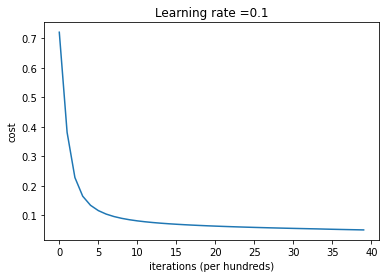

In [22]:
layers_dims = [30, 15, 1]
activation_fn = ["relu", "sigmoid"]
learning_rate = 0.1
num_iterations = 4000
print_cost = True
classes = 2
costs = []  # keep track of cost
model = Model(layers_dims, activation_fn)

# Loop (batch gradient descent)
for i in range(0, num_iterations):
    # forward
    AL = model.forward(X_train)

    # compute cost
    if classes == 2:
        cost = compute_BCE_cost(AL, y_train)
    else:
        cost = compute_CCE_cost(AL, y_train)

    # backward
    dA_prev = model.backward(AL, y_train)
    
    # update
    model.update(learning_rate)

    if print_cost and i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)
            
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [23]:
# Helper function
def predict(X, y, model, classes):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    model -- trained model
    classes - number of classes, 2 for binary classification, >2 for multi-class classification
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(model.linear) # number of layers in the neural network

    if classes == 2:
      p = np.zeros((1,m))
    else:
      p = np.zeros((classes, m))
    
    # Forward propagation
    probas = model.forward(X)
    
    if classes == 2:
      # convert probas to 0/1 predictions
      for i in range(0, probas.shape[1]):
          if probas[0,i] > 0.5:
              p[0,i] = 1
          else:
              p[0,i] = 0

      #print results
      if y is not None:
        print("Accuracy: "  + str(np.sum((p == y)/m)))

    else:
      # convert probas to one hot vector predictions
      prediction = np.argmax(probas, axis=0, out=None)
    
      for i in range(len(prediction)):
          p[prediction[i], i] = 1

      #print results
      if y is not None:
        correct = 0
        for i in range(m):
          if (p[:, i] == y[:, i]).all():
            correct += 1
        print("Accuracy: "  + str(correct/m))
        
    return p

In [24]:
pred_train = predict(X_train, y_train, model, 2)

Accuracy: 0.9824999999999999


In [25]:
pred_val = predict(X_val, y_val, model, 2)

Accuracy: 0.98


# Advanced implementation (multi class classification)

In this section, we need to implement a multi-class classifier using the functions we have previously written. We will create a model that can classify ten handwritten digits. The MNIST handwritten digit classification problem is a standard dataset in computer vision and deep learning. We usually use convolutional deep-learning neural networks for image classification. However, using only dense layers appears to be enough to handle this simple dataset, and this is a good way to get started with image datasets. 

For data preprocessing, we need to change the data type into float and scale the values between 0 and 1.

In Batch Gradient Descent, we consider all the samples for every step of Gradient Descent. But what if our dataset is huge? MNIST training data contains 60000 training samples, then to take one step, the model will have to calculate the gradients of all the 60000 samples. This does not seem an efficient way. Hence, mini-batch gradient descent is used in this part.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28)


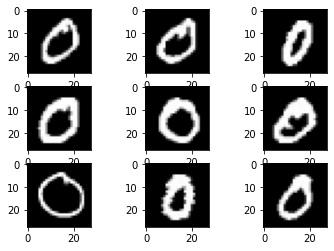

shape of X_train: (784, 60000)
shape of y_train: (10, 60000)
shape of X_test: (784, 10000)


In [26]:
# load data
data = np.load("advanced_data.npz")
X_train = data["X_train"]
y_train = data["y_train"].reshape(-1)
X_test = data["X_test"]

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s' % (X_test.shape, ))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)
# show the figure
plt.show()

# Shuffle
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]
# Reshape
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype("float32")
X_train = X_train.T
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype("float32")
X_test = X_test.T
m = y_train.shape[0]
y_train = y_train.reshape((1, m))
y_train = np.eye(10)[y_train.astype("int32")]
y_train = y_train.T.reshape(10, m)
# Normalize
X = X_train; y = y_train
min_X, max_X = X.min(axis = 0), X.max(axis = 0)
X_train = (X - min_X) / (max_X - min_X)
min_y, max_y = y.min(axis = 0), y.max(axis = 0)
y_train = (y - min_y) / (max_y - min_y)

print("shape of X_train: " + str(X_train.shape))
print("shape of y_train: " + str(y_train.shape))
print("shape of X_test: " + str(X_test.shape))

In [27]:
# Split training and validation set.
n = 48000
X_val, y_val = X_train[:, n:], y_train[:, n:]
X_train, y_train = X_train[:, :n], y_train[:, :n]

print("shape of X_train: " + str(X_train.shape) + " shape of y_train: " + str(y_train.shape))
print("shape of X_val: " + str(X_val.shape) + " shape of y_val: " + str(y_val.shape))

shape of X_train: (784, 48000) shape of y_train: (10, 48000)
shape of X_val: (784, 12000) shape of y_val: (10, 12000)


Cost after iteration 0: 0.175804
Cost after iteration 10: 0.101276
Cost after iteration 20: 0.083183
Cost after iteration 30: 0.127157
Cost after iteration 40: 0.055202
Cost after iteration 50: 0.031729
Cost after iteration 60: 0.011182
Cost after iteration 70: 0.009532
Cost after iteration 80: 0.024221
Cost after iteration 90: 0.008751
Cost after iteration 100: 0.020101
Cost after iteration 110: 0.027052
Cost after iteration 120: 0.013629
Cost after iteration 130: 0.019076
Cost after iteration 140: 0.012696
Cost after iteration 150: 0.019204
Cost after iteration 160: 0.058234
Cost after iteration 170: 0.002368
Cost after iteration 180: 0.009087
Cost after iteration 190: 0.000683
Cost after iteration 200: 0.006637
Cost after iteration 210: 0.001222
Cost after iteration 220: 0.002528
Cost after iteration 230: 0.002051
Cost after iteration 240: 0.003837
Cost after iteration 250: 0.000454
Cost after iteration 260: 0.007538
Cost after iteration 270: 0.001906
Cost after iteration 280: 0.000

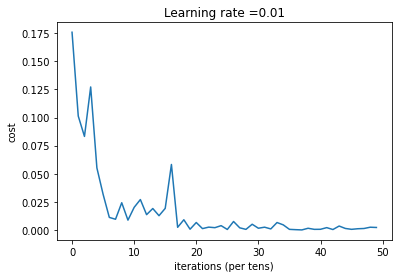

In [28]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector, of shape (number of classes, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


layers_dims = [784, 256, 10]
activation_fn = ["relu", "softmax"]
learning_rate = 0.01
num_iterations = 500
batch_size = 32
print_cost = True
classes = 10
costs = []  # keep track of cost
model = Model(layers_dims, activation_fn)

# Loop (gradient descent)
for i in range(0, num_iterations):
    mini_batches = random_mini_batches(X_train, y_train, batch_size)
    for batch in mini_batches:
        x_batch, y_batch = batch

        # forward
        AL = model.forward(x_batch)

        # compute cost
        if classes == 2:
            cost = compute_BCE_cost(AL, y_batch)
        else:
            cost = compute_CCE_cost(AL, y_batch)

        # backward
        dA_prev = model.backward(AL, y_batch)
        # update
        model.update(learning_rate)

    #if print_cost and i % 100 == 0:
    if print_cost and i % 10 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)
           
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [29]:
pred_train = predict(X_train, y_train, model, 10)

Accuracy: 1.0


In [30]:
pred_val = predict(X_val, y_val, model, 10)

Accuracy: 0.9779166666666667


In [31]:
pred_test = predict(X_test, None, model, 10)